In [1]:
# load libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind_from_stats
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import scale, StandardScaler, LabelBinarizer
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler  
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import metrics

from sklearn.cluster import KMeans, DBSCAN

from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import silhouette_score


# from sklearn_pandas import DataFrameMapper
# from sklearn.pipeline import Pipeline
# from estimators import Estimator
# import statsmodels.formula.api as smf
# from sklearn.svm import SVC
# from sklearn import metrics
# from sklearn.neighbors import KNeighborsClassifier 
# from sklearn.cluster import KMeans, DBSCAN
# from scipy.cluster.hierarchy import linkage, dendrogram, fcluster


In [2]:
# common functions

# {'measure_no': 1, 'precision': array([0.59770115, 0.36144578, 0.        , 0.        , 0.        ]), 'recall': array([0.59770115, 0.73170732, 0.        , 0.        , 0.        ]), 'f1_score': array([0.59770115, 0.48387097, 0.        , 0.        , 0.        ]), 'accuracy': 0.4426877470355731}
def get_metrics(_test, _pred):
    precision = metrics.precision_score(_test, _pred, average = None)
    f1_score = metrics.f1_score(_test, _pred, average = None)
    accuracy = metrics.accuracy_score(_test, _pred)
    recall = metrics.recall_score(_test, _pred, average = None)
    return {'precision': precision, 'f1_score': f1_score, 'recall': recall, 'accuracy': accuracy, }

    
def displaying_metrics(m, feature_name, nice_name):
    print('Feature Name: ', feature_name)
    print(nice_name, m['depth_number'])
    print('precision: ', m['precision'])
    print('recall: ', m['recall'])
    print('f1_score: ', m['f1_score'])
    print('accuracy: ', m['accuracy'])
    print('error: ', 1-m['accuracy'])
    print('\n')
            
            
def find_max_accuracy (_all_metrics, start_range, feature_name):
    max_accuracy = -1;
    use_this_one = []
    knn_no = start_range-1;
    
    avg_accuracy = 0
    
    for m in _all_metrics:
        knn_no += 1
        avg_accuracy = 0
        for i in m:
            for f in i:
                precision = i[f]['precision']
                recall = i[f]['recall']
                f1 = i[f]['f1_score']
                accuracy = i[f]['accuracy']
            tmp = {'depth_number': knn_no, 'precision': precision, 'recall': recall, 'f1_score': f1, 'accuracy': accuracy}
            if max_accuracy < accuracy and feature_name == f:
                max_accuracy = accuracy  
                use_this_one = tmp
    return use_this_one;

In [3]:
# read data
data = pd.read_csv("responses.csv")
# Like, Dislike and Indifferent(1,-1,0)

X = data.iloc[:,31:63]

def like(x):
   if (x == 1.0 or x == 2.0):
       return -1
   elif x == 3.0:
       return 0
   elif (x == 4.0 or x == 5.0):
       return 1

for i in list(X):
   data[i] = data.apply(lambda row: like(row[i]), axis=1)

In [4]:
#Categorical to Continuous

def alcohol(x):
    if x == "drink a lot":
        return 5
        
    elif x == "social drinker":
        return 3
        
    elif x == "never":
        return 1

def Smoking(x):
    if x == "never smoked":
        return 1
        
    elif x == "tried smoking":
        return 2
        
    elif x == "former smoker":
        return 3
        
    elif x == "current smoker":
        return 4
    
    
def gender(x):
    if x == "female":
        return 0
        
    elif x == "male":
        return 1
        
        
def handed(x):
    if x == "right handed":
        return 1
        
    elif x == "left handed":
        return 0
        

def education(x):
    if x == "college/bachelor degree":
        return 4
        
    elif x == "secondary school":
        return 3
        
    elif x == "primary school":
        return 2
        
    elif x == "doctorate degree":
        return 5
        
    elif x == "currently a primary school pupil":
        return 1
        
        
def child(x):
    if x == "yes":
        return 1
        
    elif x == "no":
        return 0

def village(x):
    if x == "village":
        return 0
        
    elif x == "city":
        return 1

def house(x):
    if x == "block of flats":
        return 0
        
    elif x == "house/bungalow":
        return 1
        

def internet(x):
    if x == "few hours a day":
        return 3
        
    elif x == "less than an hour a day":
        return 2
        
    elif x == "most of the day":
        return 4
        
    elif x == "no time at all" :
        return 1
        

data['Smoking'] = data.apply(lambda row: Smoking(row['Smoking']), axis=1)
data['Alcohol'] = data.apply(lambda row: alcohol(row['Alcohol']), axis=1)
data['Gender'] = data.apply(lambda row: gender(row['Gender']), axis=1)
data['Left - right handed'] = data.apply(lambda row: handed(row['Left - right handed']), axis=1)
data['Education'] = data.apply(lambda row: education(row['Education']), axis=1)
data['Only child'] = data.apply(lambda row: child(row['Only child']), axis=1)
data['Village - town'] = data.apply(lambda row: village(row['Village - town']), axis=1)
data['House - block of flats'] = data.apply(lambda row: house(row['House - block of flats']), axis=1)
data['Internet usage'] = data.apply(lambda row: internet(row['Internet usage']), axis=1)



In [5]:
data = data.drop(columns = ['Punctuality','Lying'])
data = data.dropna()
data.to_csv('output.csv', sep=',')
data.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,0.0,1.0,4.0,0.0,0.0,0.0
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,0.0,1.0,4.0,0.0,1.0,0.0
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,0.0,1.0,3.0,0.0,1.0,0.0
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,0.0,1.0,3.0,0.0,0.0,1.0
5,5.0,3.0,2.0,3.0,2.0,3.0,3.0,2.0,5.0,5.0,...,20.0,186.0,77.0,1.0,1.0,1.0,3.0,0.0,1.0,0.0


In [6]:
X = data.iloc[:,20:]
Y = data[['Country', 'Classical music', 'Pop', 'Rock']]

# change float types to ints
for i in Y:
    Y[i] = Y[i].astype('int64')
    
pd.set_option('display.max_columns', None)
display(X.head())
display(Y.head())
#Check for missing values
# data.isnull().sum().sum()


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,Reading,Geography,Foreign languages,Medicine,Law,Cars,Art exhibitions,Religion,"Countryside, outdoors",Dancing,Musical instruments,Writing,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous dogs,Fear of public speaking,Smoking,Alcohol,Healthy eating,Daily events,Prioritising workload,Writing notes,Workaholism,Thinking ahead,Final judgement,Reliability,Keeping promises,Loss of interest,Friends versus money,Funniness,Fake,Criminal damage,Decision making,Elections,Self-criticism,Judgment calls,Hypochondria,Empathy,Eating to survive,Giving,Compassion to animals,Borrowed stuff,Loneliness,Cheating in school,Health,Changing the past,God,Dreams,Charity,Number of friends,Waiting,New environment,Mood swings,Appearence and gestures,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Internet usage,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,4.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,3.0,1.0,2.0,-1.0,1.0,-1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,-1.0,-1.0,-1.0,1.0,0.0,0.0,-1.0,-1.0,1.0,1.0,-1.0,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5,3.0,1.0,3.0,2.0,1.0,5.0,4.0,2.0,2.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,3.0,5.0,1.0,1.0,3.0,4.0,1.0,3.0,1.0,3.0,1,4.0,5.0,4.0,3.0,2.0,1.0,1.0,1.0,4,2.0,3,3.0,4.0,3.0,4.0,3.0,4.0,3.0,5.0,1.0,1.0,3.0,5.0,5.0,1.0,4.0,5.0,1.0,4.0,3.0,2.0,3.0,4.0,3.0,3,3.0,4.0,5.0,3.0,3.0,1,3.0,20.0,163.0,48.0,1.0,0.0,1.0,4.0,0.0,0.0,0.0
1,2.0,2.0,4.0,3.0,4.0,1.0,3.0,5.0,4.0,1.0,4.0,-1.0,0.0,1.0,1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,-1.0,1.0,-1.0,1.0,1.0,1.0,1.0,2.0,1.0,1,1.0,3.0,1.0,4.0,1.0,5.0,3.0,3.0,2.0,4.0,5.0,4.0,1.0,4.0,4.0,3.0,4.0,3.0,2.0,1.0,2.0,5.0,4.0,4.0,1.0,2.0,1,2.0,4.0,3.0,2.0,4.0,4.0,4.0,1.0,3,1.0,3,3.0,4.0,4.0,4.0,4.0,2.0,4.0,2.0,2.0,5.0,4.0,4.0,4.0,1.0,4.0,3.0,5.0,3.0,4.0,5.0,3.0,2.0,3.0,3,3.0,4.0,1.0,4.0,2.0,5,2.0,19.0,163.0,58.0,2.0,0.0,1.0,4.0,0.0,1.0,0.0
2,3.0,4.0,4.0,2.0,4.0,2.0,5.0,5.0,2.0,2.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,0.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1.0,1.0,1.0,2.0,2.0,5.0,3.0,1.0,2.0,5.0,3.0,5.0,3.0,4.0,5.0,1.0,5.0,2.0,4.0,1.0,3.0,5.0,4.0,4.0,1.0,5.0,5,5.0,4.0,2.0,5.0,3.0,2.0,5.0,5.0,1,3.0,3,2.0,3.0,4.0,3.0,5.0,3.0,4.0,4.0,3.0,4.0,3.0,2.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,4.0,5.0,3.0,1.0,3,2.0,4.0,1.0,4.0,3.0,4,2.0,20.0,176.0,67.0,2.0,0.0,1.0,3.0,0.0,1.0,0.0
4,4.0,4.0,5.0,2.0,3.0,3.0,4.0,4.0,3.0,1.0,4.0,0.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,1.0,-1.0,0.0,0.0,-1.0,0.0,-1.0,1.0,1.0,-1.0,0.0,-1.0,0.0,-1.0,1.0,0.0,0.0,0.0,-1.0,1.0,-1.0,-1.0,1.0,2.0,1.0,1.0,1.0,1,2.0,2.0,4.0,3.0,2.0,3.0,4.0,3.0,1.0,2.0,3.0,5.0,5.0,5.0,4.0,2.0,3.0,3.0,2.0,1.0,3.0,5.0,5.0,5.0,1.0,3.0,1,3.0,3.0,4.0,3.0,5.0,3.0,4.0,5.0,3,3.0,3,3.0,4.0,2.0,3.0,3.0,3.0,3.0,5.0,4.0,2.0,3.0,5.0,5.0,2.0,3.0,5.0,3.0,3.0,2.0,4.0,3.0,3.0,3.0,3,4.0,3.0,4.0,3.0,3.0,2,4.0,20.0,170.0,59.0,1.0,0.0,1.0,3.0,0.0,0.0,1.0
5,5.0,5.0,5.0,2.0,3.0,3.0,4.0,3.0,3.0,2.0,4.0,1.0,0.0,1.0,-1.0,0.0,1.0,1.0,-1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,0.0,-1.0,0.0,0.0,-1.0,3.0,2.0,2.0,2.0,1.0,2,2.0,1.0,1.0,3.0,1.0,1.0,2.0,2.0,2.0,3.0,3.0,3.0,1.0

,Country,Classical music,Pop,Rock
0,2,2,5,5
1,1,1,3,5
2,3,4,3,5
4,2,4,5,3
5,2,3,2,5


In [7]:
# Exploratory Data Analysis

selected_data = data.iloc[:,31:63]

# for i in Y:
# X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.25, random_state = 1)
# scaler = StandardScaler()
# scaler.fit(X_train)
# X_train_scaled = scaler.transform(X_train)
# X_test_scaled = scaler.transform(X_test)
# display(Y_train.head())

# y_features = Y_test.columns.values

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: Series.data is deprecated and will be removed in a future version
  


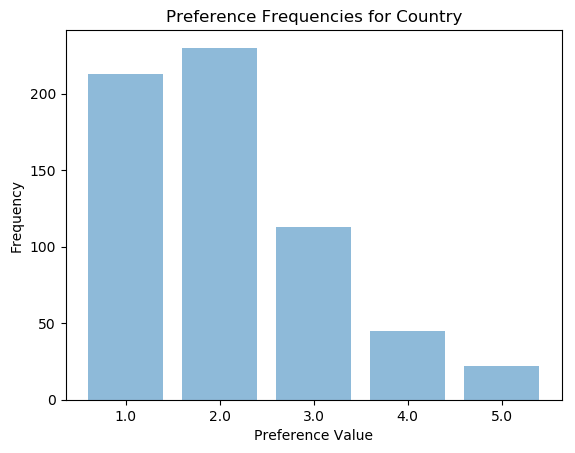

1.0    213
2.0    230
3.0    113
4.0     45
5.0     22
Name: Country, dtype: int64
Mean: 2.0898876404494384 , Median: 2.0





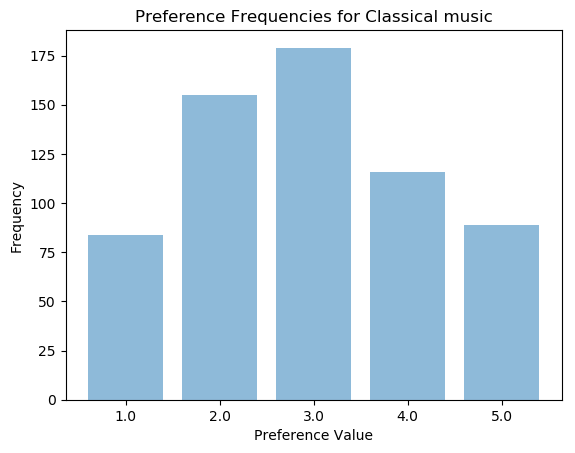

1.0     84
2.0    155
3.0    179
4.0    116
5.0     89
Name: Classical music, dtype: int64
Mean: 2.9534510433386836 , Median: 3.0





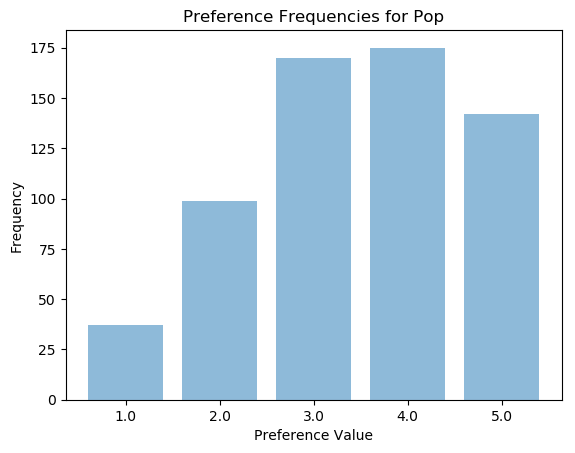

1.0     37
2.0     99
3.0    170
4.0    175
5.0    142
Name: Pop, dtype: int64
Mean: 3.4590690208667736 , Median: 4.0





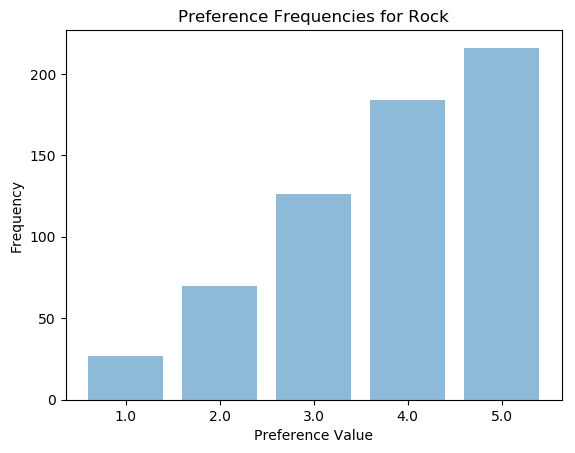

1.0     27
2.0     70
3.0    126
4.0    184
5.0    216
Name: Rock, dtype: int64
Mean: 3.7897271268057784 , Median: 4.0





In [8]:
# Exploratory Data Analysis

# calculate the number of 1-5 scores for each music genre in the general population and graph them

genres = ['Country', 'Classical music', 'Pop', 'Rock']

for genre in genres:
    
    genre_frequencies = data[genre].value_counts().sort_index()
    
    plt.rcdefaults()
    objects = genre_frequencies.index.tolist() #('1','2','3','4','5')
    y_pos = np.arange(len(objects))
    counts = genre_frequencies.data.tolist()

    plt.bar(y_pos, counts, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('Frequency')
    plt.xlabel('Preference Value')
    plt.title('Preference Frequencies for {}'.format(genre))

    plt.show()
    
    print(genre_frequencies)
    print("Mean:", data[genre].mean(), ", Median:",data[genre].median())
    print(end='\n\n\n')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: Series.data is deprecated and will be removed in a future version
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: FutureWarning: Series.data is deprecated and will be removed in a future version


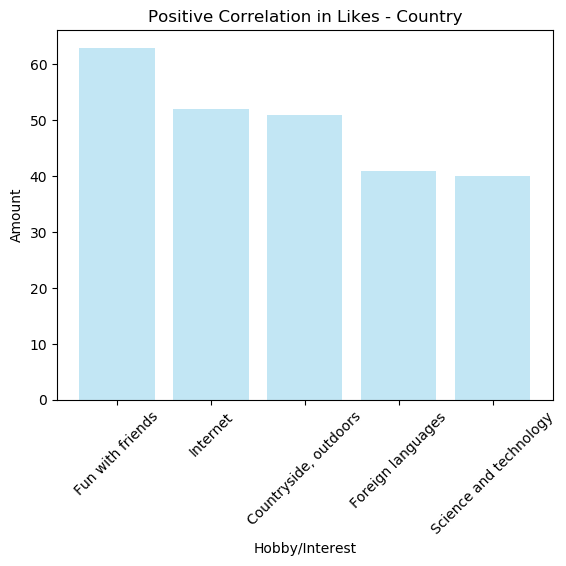

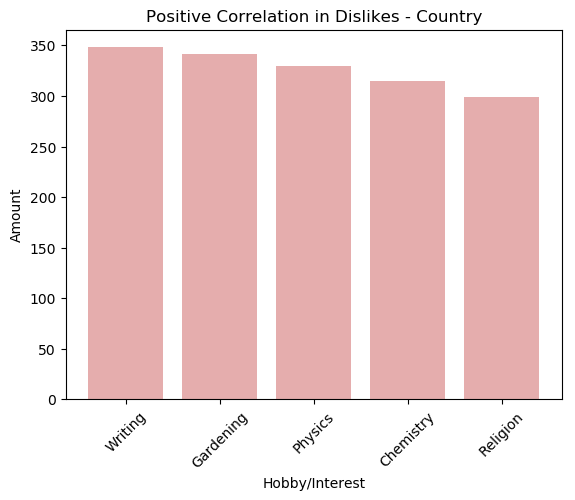

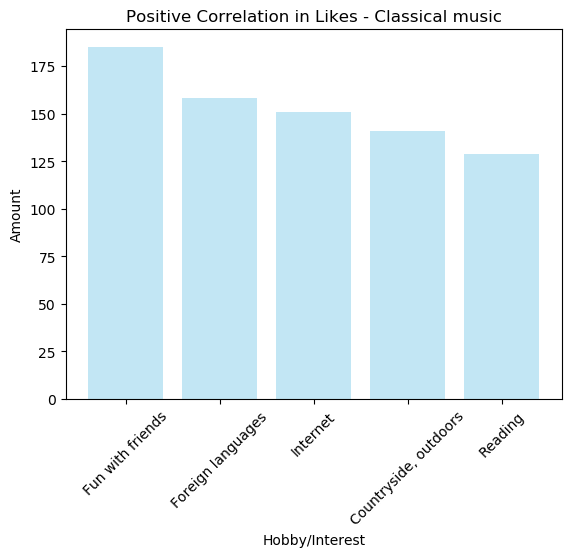

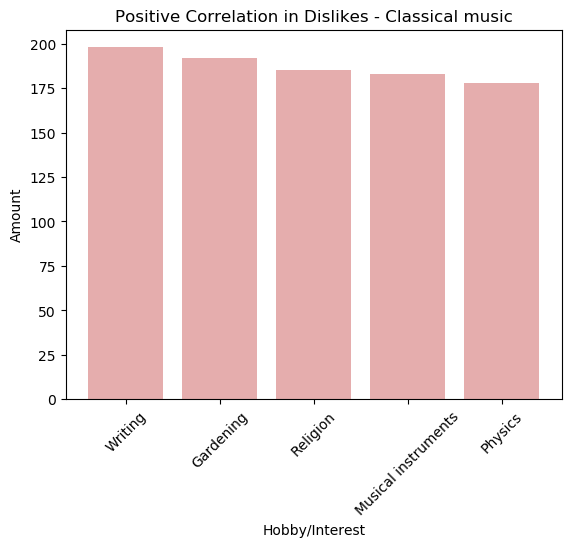

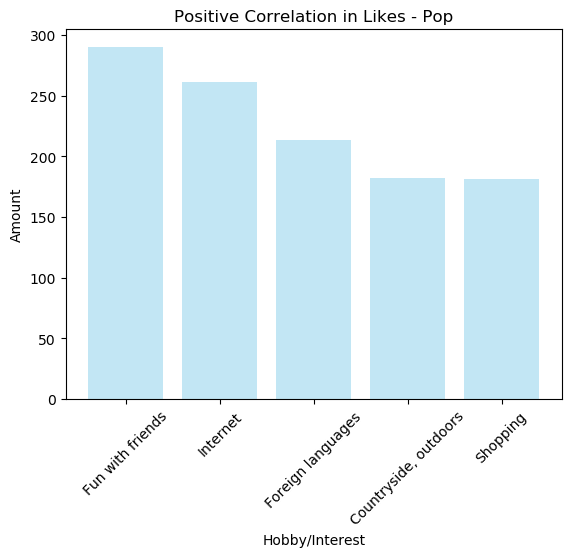

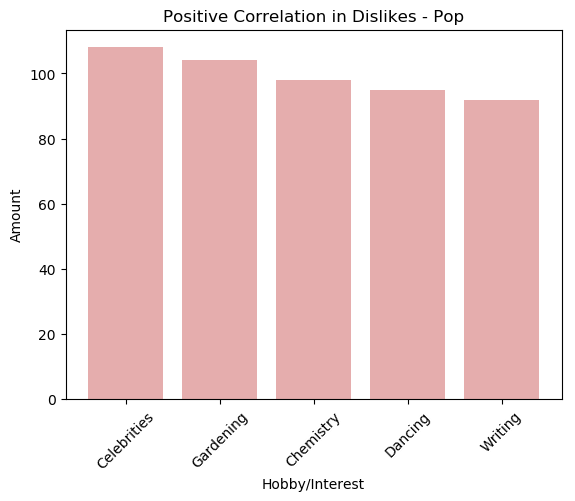

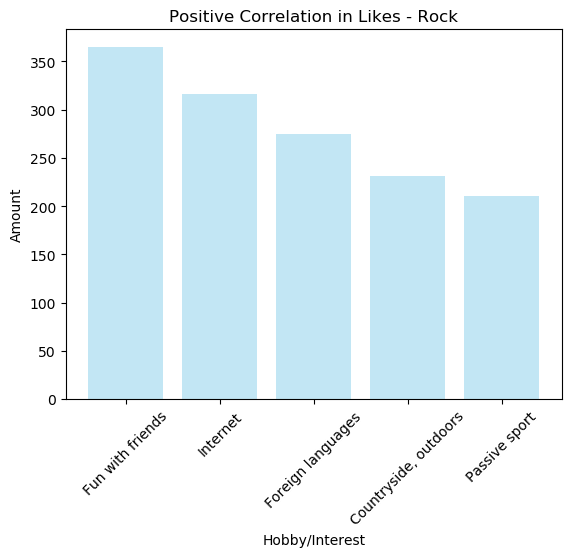

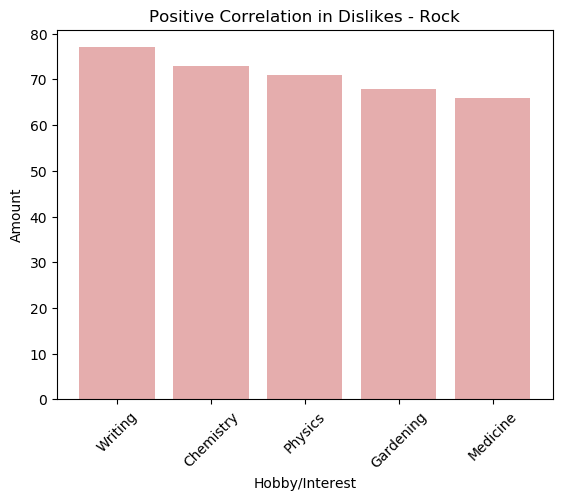

In [9]:
# Exploratory Data Analysis

# for high scorers in each genre (score = 4-5), find out what hobbies they were also interested in (score = 1)
for genre in genres:
    # extract all observations in which the music genre score was 4 or 5
    high_scorers = data.loc[(data[genre] == 4) | (data[genre] == 5)]
    high_scorers_hobbies = high_scorers.iloc[:,31:63]
    positive_correlations = []
    
    low_scorers = data.loc[(data[genre] == 1) | (data[genre] == 2)]
    low_scorers_hobbies = low_scorers.iloc[:,31:63]
    negative_correlations = []
    
    # for each hobby further isolate observations in which the hobby had positive or negative correlation
    for column in high_scorers_hobbies:
        positive_scores = high_scorers_hobbies[column].value_counts().sort_index()
        positive_correlations.append((column, positive_scores.data[-1]))
        
        negative_scores = low_scorers_hobbies[column].value_counts().sort_index()
        negative_correlations.append((column, negative_scores.data[0]))

    # graph the top 5 positive and negative correlations for each genre
    top_positives = sorted(positive_correlations, key = lambda x: x[1], reverse=True)[:5]
    top_negatives = sorted(negative_correlations, key = lambda x: x[1], reverse=True)[:5]

    plt.rcdefaults()
    objects = [x[0] for x in top_positives] #label for each bar
    y_pos = np.arange(len(objects))
    counts = [x[1] for x in top_positives]

    plt.bar(y_pos, counts, align='center', color='SkyBlue', alpha=0.5)
    plt.xticks(y_pos, objects, rotation=45)
    plt.ylabel('Amount')
    plt.xlabel('Hobby/Interest')
    plt.title('Positive Correlation in Likes - {}'.format(genre))

    plt.show()
    
    plt.rcdefaults()
    objects = [x[0] for x in top_negatives] #label for each bar
    y_pos = np.arange(len(objects))
    counts = [x[1] for x in top_negatives]

    plt.bar(y_pos, counts, align='center', color='IndianRed', alpha=0.5)
    plt.xticks(y_pos, objects, rotation=45)
    plt.ylabel('Amount')
    plt.xlabel('Hobby/Interest')
    plt.title('Positive Correlation in Dislikes - {}'.format(genre))

    plt.show()

In [10]:
# Classification

# first one
X = data.iloc[:,20:]

# for i in Y:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.25, random_state = 1)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
display(Y_train.head())

y_features = Y_test.columns.values

,Country,Classical music,Pop,Rock
670,2,2,3,3
863,2,4,3,2
688,1,3,4,5
39,2,2,5,5
966,1,5,1,1


In [11]:
# decistion tree classifier

import warnings
warnings.filterwarnings('ignore')

_all_metrics = []
start_range = 3
for i in range(start_range, 20):
    # KNN classifiers
    classifier = DecisionTreeClassifier(criterion = "entropy", random_state = 0, max_depth = i)
    classifier.fit(X_train_scaled, Y_train)

    Y_pred = classifier.predict(X_test_scaled) 
    Y_pred_T = Y_pred.T

    # metrics
    _metrics = []
    pred_index = -1;
    for col_name in Y_test:
        pred_index += 1

        _pred = Y_pred_T[pred_index]
        _test = Y_test[col_name]
        m = get_metrics(_test, _pred)

        _metrics.append({col_name: m})
#     display(_metrics)
    _all_metrics.append(_metrics)

# features = ['Country', 'Classical music', 'Pop', 'Rock']



feature_accuracies = []

for f in y_features:
    _max_based_accuracy = find_max_accuracy(_all_metrics, start_range, f)
    feature_accuracies.append(_max_based_accuracy)
    
for f in range(len(feature_accuracies)):
    displaying_metrics(feature_accuracies[f], y_features[f], 'Decision Tree Depth')


Feature Name:  Country
Decision Tree Depth 4
precision:  [0.42857143 0.51388889 0.         0.         0.        ]
recall:  [0.73469388 0.61666667 0.         0.         0.        ]
f1_score:  [0.54135338 0.56060606 0.         0.         0.        ]
accuracy:  0.46794871794871795
error:  0.532051282051282


Feature Name:  Classical music
Decision Tree Depth 7
precision:  [0.23809524 0.30612245 0.36363636 0.23809524 0.2       ]
recall:  [0.27777778 0.39473684 0.41666667 0.17857143 0.08333333]
f1_score:  [0.25641026 0.34482759 0.38834951 0.20408163 0.11764706]
accuracy:  0.30128205128205127
error:  0.6987179487179487


Feature Name:  Pop
Decision Tree Depth 12
precision:  [0.44444444 0.18181818 0.26829268 0.33333333 0.39285714]
recall:  [0.44444444 0.28571429 0.23913043 0.34090909 0.30555556]
f1_score:  [0.44444444 0.22222222 0.25287356 0.33707865 0.34375   ]
accuracy:  0.30128205128205127
error:  0.6987179487179487


Feature Name:  Rock
Decision Tree Depth 8
precision:  [0.         0.1875

In [32]:
classifier = DecisionTreeClassifier(criterion = "entropy", random_state = 0, max_depth = 3)
classifier.fit(X_train_scaled, Y_train)

Y_pred = classifier.predict(X_test_scaled) 
# print(Y_pred.T)

features = ['Country'] # Country, Classical music, Pop, Rock

conf_matrix = metrics.confusion_matrix(Y_test['Country'], Y_pred.T[0])

sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [13]:
conf_matrix = metrics.confusion_matrix(Y_test['Classical music'], Y_pred.T[1])

sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [14]:
conf_matrix = metrics.confusion_matrix(Y_test['Pop'], Y_pred.T[0])

sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [15]:
conf_matrix = metrics.confusion_matrix(Y_test['Rock'], Y_pred.T[0])

sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [16]:
import warnings
warnings.filterwarnings('ignore')

_all_metrics = []
start_range = 3
for i in range(start_range, 20):
    # KNN classifiers
    classifier = KNeighborsClassifier(n_neighbors = i)  
    classifier.fit(X_train_scaled, Y_train)

    Y_pred = classifier.predict(X_test_scaled) 
    Y_pred_T = Y_pred.T

    # metrics
    _metrics = []
    pred_index = -1;
    for col_name in Y_test:
        pred_index += 1

        _pred = Y_pred_T[pred_index]
        _test = Y_test[col_name]
        m = get_metrics(_test, _pred)

        _metrics.append({col_name: m})
    _all_metrics.append(_metrics)

feature_accuracies = []

for f in y_features:
    _max_based_accuracy = find_max_accuracy(_all_metrics, start_range, f)
    feature_accuracies.append(_max_based_accuracy)

    
for f in range(len(feature_accuracies)):
    displaying_metrics(feature_accuracies[f], y_features[f], 'KNN ')


Feature Name:  Country
KNN  12
precision:  [0.44680851 0.37894737 0.35714286 0.         0.        ]
recall:  [0.42857143 0.6        0.2        0.         0.        ]
f1_score:  [0.4375     0.46451613 0.25641026 0.         0.        ]
accuracy:  0.3974358974358974
error:  0.6025641025641026


Feature Name:  Classical music
KNN  3
precision:  [0.31578947 0.25714286 0.29090909 0.3        0.        ]
recall:  [0.33333333 0.47368421 0.33333333 0.10714286 0.        ]
f1_score:  [0.32432432 0.33333333 0.31067961 0.15789474 0.        ]
accuracy:  0.27564102564102566
error:  0.7243589743589743


Feature Name:  Pop
KNN  8
precision:  [0.         0.2        0.3        0.32142857 0.4137931 ]
recall:  [0.         0.19047619 0.32608696 0.40909091 0.33333333]
f1_score:  [0.         0.19512195 0.3125     0.36       0.36923077]
accuracy:  0.3141025641025641
error:  0.6858974358974359


Feature Name:  Rock
KNN  9
precision:  [0.         0.         0.2244898  0.34782609 0.48571429]
recall:  [0.         0

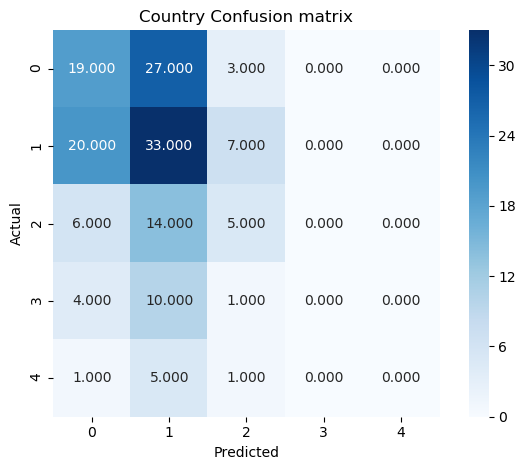

In [39]:
# best KNN based on the range 3-20
classifier = KNeighborsClassifier(n_neighbors = 11)  
classifier.fit(X_train_scaled, Y_train)

Y_pred = classifier.predict(X_test_scaled) 

features = ['Country'] # Country, Classical music, Pop, Rock

conf_matrix = metrics.confusion_matrix(Y_test['Country'], Y_pred.T[0])

sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Country Confusion matrix')
plt.tight_layout()
plt.show()

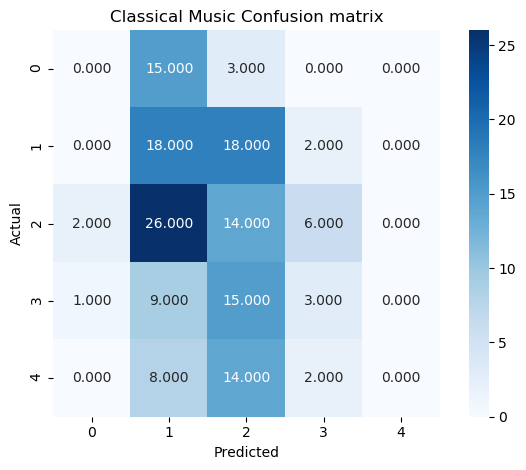

In [40]:
conf_matrix = metrics.confusion_matrix(Y_test['Classical music'], Y_pred.T[1])

sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Classical Music Confusion matrix')
plt.tight_layout()

plt.show()

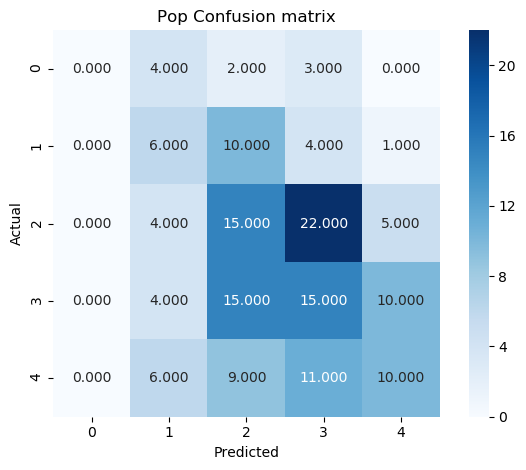

In [43]:
conf_matrix = metrics.confusion_matrix(Y_test['Pop'], Y_pred.T[2])

sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Pop Confusion matrix')
plt.tight_layout()

plt.show()

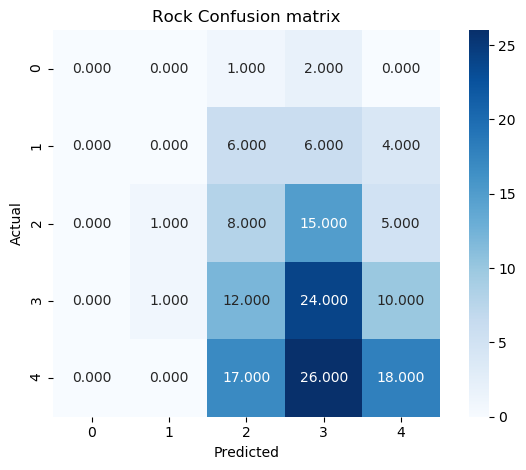

In [45]:
conf_matrix = metrics.confusion_matrix(Y_test['Rock'], Y_pred.T[3])

sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Rock Confusion matrix')
plt.tight_layout()

plt.show()

In [46]:
# clustering using k-means clustering
def get_clustering_metrics(data, feature):
    adjusted_rand_index = adjusted_rand_score(data[feature], data['clusters'])
    silhouette_coefficient = silhouette_score(data, clusters, metric = "euclidean")
    return {'adjusted_rand_index': adjusted_rand_index, 'silhouette_coefficient': silhouette_coefficient}

col_names = list(data.columns.values)

use_this_cluster = KMeans(n_clusters = 2, init = 'random', n_init = 1, random_state = 2).fit(data)
clusters = use_this_cluster.labels_
data['clusters'] = clusters

for f in y_features:
    _ret = get_clustering_metrics(data, f)
#     print(f, ' ', _ret)

count = 0
# for c in col_names:
#     for f in y_features:
#         ax = data.plot(kind = 'scatter', x = c, y = f, c = 'clusters', colormap = plt.cm.brg)
#         ax.set(title = (f+ ' Plots: ' + c), xlabel = c, ylabel = f)

# #     count += 1
# #     if count == 10:
# #         break
    
# print(_ret)




In [58]:
# clustering using k-means clustering
def find_max_silhouett_coeff(_all_metrics, cluster_no, feature):
    max_silhouette_coefficient = -1
    use_this_one = {}
    
    for cluster_info in _all_metrics:
        silhouette_coefficient = cluster_info[cluster_no]['silhouette_coefficient']
        adjusted_rand_index = cluster_info[cluster_no]['adjusted_rand_index']
        f = cluster_info[cluster_no]['feature']
        if max_silhouette_coefficient < silhouette_coefficient and feature == f:
            max_silhouette_coefficient = silhouette_coefficient
            use_this_one = {'feature': feature, 'cluster_no: ': cluster_no, 'silhouette_coefficient': silhouette_coefficient, 'adjusted_rand_index': adjusted_rand_index}

        cluster_no += 1
    return use_this_one

def display_cluster (feature, _metrics):
    print('\nFeature Name: ', feature);
    print(_metrics)
#     print(_metrics['cluster_no'])
#     print('cluster_no: ', _metrics['cluster_no'])
#     print('silhouette_coefficient: ', _metrics['silhouette_coefficient'])
#     print('adjusted_rand_index: ', _metrics['adjusted_rand_index'])

def find_max_adjusted_rand_index():
    max_adjusted_rand_index = -1
    return max_adjusted_rand_index
    
def get_clustering_metrics(data, feature, tmp):
    adjusted_rand_index = adjusted_rand_score(data[feature], tmp['clusters'])
    silhouette_coefficient = silhouette_score(tmp, clusters, metric = "euclidean")
    return {'feature': feature, 'adjusted_rand_index': adjusted_rand_index, 'silhouette_coefficient': silhouette_coefficient}

col_names = list(data.columns.values)


_metrics = []
start = 2
end = 10


_max_metrics_all_features = []
for f in y_features:
    _metrics = []
    tmp = data.drop(f, axis = 1)
#     display(tmp)
    for no_clusters in range(start, end):
        use_this_cluster = KMeans(n_clusters = no_clusters, init = 'random', n_init = 1, random_state = 2).fit(tmp)
        clusters = use_this_cluster.labels_
        tmp['clusters'] = clusters
        _ret = get_clustering_metrics(data, f, tmp)
        
        _metrics.append({no_clusters:_ret})
        
    _max_silhouett_coeff = find_max_silhouett_coeff(_metrics, start, f)
    _max_metrics_all_features.append(_max_silhouett_coeff)
    
count = 0
for feature_metrics in _max_metrics_all_features:
    display_cluster(y_features[count], feature_metrics)
    count += 1


Feature Name:  Country
{'feature': 'Country', 'cluster_no: ': 2, 'silhouette_coefficient': 0.32029391108445926, 'adjusted_rand_index': 0.009424981083817913}

Feature Name:  Classical music
{'feature': 'Classical music', 'cluster_no: ': 2, 'silhouette_coefficient': 0.3205848327581799, 'adjusted_rand_index': -0.0024674399684553594}

Feature Name:  Pop
{'feature': 'Pop', 'cluster_no: ': 2, 'silhouette_coefficient': 0.320404784253335, 'adjusted_rand_index': 0.011555571399077303}

Feature Name:  Rock
{'feature': 'Rock', 'cluster_no: ': 2, 'silhouette_coefficient': 0.3204367588669452, 'adjusted_rand_index': 0.0025156290067130855}


In [59]:
count = 0
# print(len(col_names))
z = int(len(col_names)/2)

# print(z)
x_features_1 = col_names[0:z]
x_features_2 = col_names[z:len(col_names)]

# print(len(x_features_1))
# print(len(x_features_2))

for x1 in x_features_1:
    for x2 in x_features_2:
        ax = data.plot(kind = 'scatter', x = x1, y = x2, c = 'clusters', colormap = plt.cm.brg)
        ax.set(title = (x1+ ' Plots: ' + x2), xlabel = x1, ylabel = x2)

#     for f in y_feature:
    count += 1
    if count == 3:
        break
    
# print(_ret)

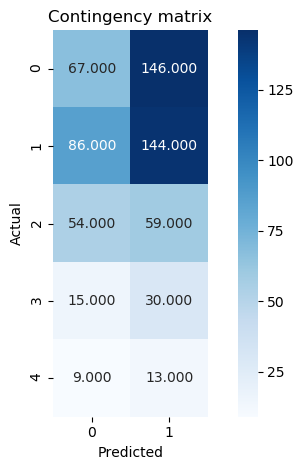

In [65]:
# using the highest siluette coeff
use_this_cluster = KMeans(n_clusters = 2, init = 'random', n_init = 1, random_state = 2).fit(data)
clusters = use_this_cluster.labels_
data['clusters'] = clusters

cont_matrix = metrics.cluster.contingency_matrix(data['Country'], data['clusters'])
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()
plt.show()

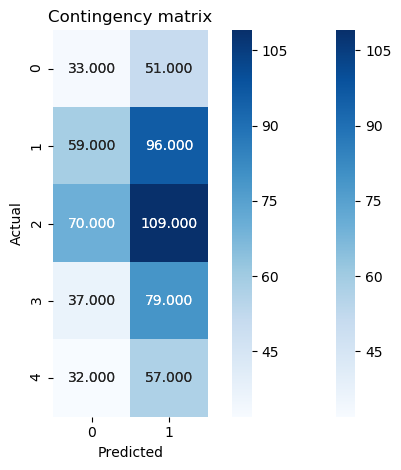

In [63]:
cont_matrix = metrics.cluster.contingency_matrix(data['Classical music'], data['clusters'])
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()
plt.show()

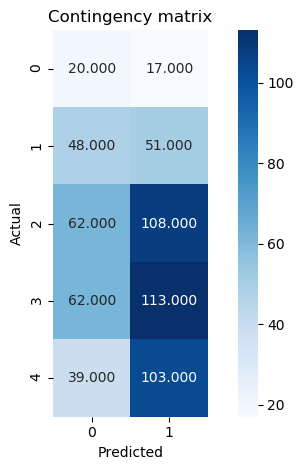

In [66]:
cont_matrix = metrics.cluster.contingency_matrix(data['Pop'], data['clusters'])
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()
plt.show()

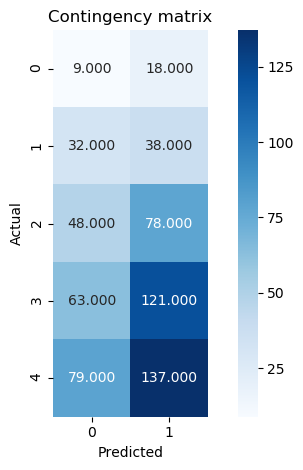

In [67]:
cont_matrix = metrics.cluster.contingency_matrix(data['Rock'], data['clusters'])
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()
plt.show()

In [28]:
def find_max_silhouett_coeff(_all_metrics, cluster_no):
    max_silhouette_coefficient = -1
    use_this_one = {}
          
    for cluster_info in _all_metrics:
#         print(cluster_info)
        silhouette_coefficient = cluster_info[cluster_no]['silhouette_coefficient']
        adjusted_rand_index = cluster_info[cluster_no]['adjusted_rand_index']
        
        if max_silhouette_coefficient < silhouette_coefficient:
            max_silhouette_coefficient = silhouette_coefficient
            use_this_one = {'cluster_no: ': cluster_no, 'silhouette_coefficient': silhouette_coefficient, 'adjusted_rand_index': adjusted_rand_index}

        cluster_no += 1
    return use_this_one

_features = ['Country']
# for y_feature in y_features:
total_samples = 10
_max_metrics_all_features = []
start = 2

for y_feature in _features:
    _metrics = []
    for sample in range(start, total_samples):
        tmp = data.drop(y_feature, axis = 1)
        clustering = DBSCAN(eps = 1, min_samples = sample, metric = "euclidean").fit(tmp)
        clusters = clustering.labels_       
        _metrics.append({sample:_ret})
#     print("met ",_metrics)
    _max_silhouett_coeff = find_max_silhouett_coeff(_metrics, start)
    _max_metrics_all_features.append(_max_silhouett_coeff)


count = 0
for feature_metrics in _max_metrics_all_features:
    display_cluster(y_features[count], feature_metrics)
    count += 1


Feature Name:  Country
{'cluster_no: ': 2, 'silhouette_coefficient': 0.06435037416450193, 'adjusted_rand_index': 0.0025156290067130855}


In [29]:

_features = ['Country']
# for y_feature in y_features:
total_samples = 10
_max_metrics_all_features = []
start = 2

_eps = 0

for y_feature in _features:
    _metrics = []
    _eps += 1
    for sample in range(start, total_samples):
        tmp = data.drop(y_feature, axis = 1)
        clustering = DBSCAN(eps = _eps, min_samples = sample, metric = "euclidean").fit(tmp)
        clusters = clustering.labels_       
        _metrics.append({sample:_ret})
#     print("met ",_metrics)
    _max_silhouett_coeff = find_max_silhouett_coeff(_metrics, start)
    _max_metrics_all_features.append(_max_silhouett_coeff)


count = 0
for feature_metrics in _max_metrics_all_features:
    display_cluster(y_features[count], feature_metrics)
    count += 1


Feature Name:  Country
{'cluster_no: ': 2, 'silhouette_coefficient': 0.06435037416450193, 'adjusted_rand_index': 0.0025156290067130855}


In [30]:
# using the highest siluette coeff
tmp = data.drop('Country', axis = 1)
use_this_cluster = DBSCAN(eps = 1, min_samples = 2, metric = "euclidean").fit(tmp)
clusters = use_this_cluster.labels_
data['clusters'] = clusters

cont_matrix = metrics.cluster.contingency_matrix(data['Country'], data['clusters'])
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

In [31]:
# using the highest siluette coeff
tmp = data.drop('Classical music', axis = 1)
use_this_cluster = DBSCAN(eps = 1, min_samples = 2, metric = "euclidean").fit(tmp)
clusters = use_this_cluster.labels_
data['clusters'] = clusters

cont_matrix = metrics.cluster.contingency_matrix(data['Classical music'], data['clusters'])
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()